In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## 1. Load the required libraries and read the dataset.

In [7]:
df = pd.read_csv('renttherunway.csv')
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [8]:
# computing number of rows
rows = len(df.axes[0])
 
# computing number of columns
cols = len(df.axes[1])
 
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

df.info()

Number of Rows:  192544
Number of Columns:  16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float6

##  Check the statistical summary of the dataset and write your inferences.

In [6]:
df.describe()

,Unnamed: 0,user_id,item_id,rating,size,age
count,192544.000000,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,96271.500000,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,55582.809453,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,0.000000,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,48135.750000,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,96271.500000,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,144407.250000,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,192543.000000,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


In [7]:
df.describe(include='O')

,fit,bust size,weight,rented for,review_text,body type,review_summary,category,height,review_date
count,192544,174133,162562,192534,192482,177907,192199,192544,191867,192544
unique,3,106,190,9,191027,7,154736,68,24,2274
top,fit,34b,130lbs,wedding,.,hourglass,Stylist Review,dress,"5' 4""","June 15, 2016"
freq,142058,27285,14370,57784,63,55349,977,92884,28012,844


#### MOst of the dresses were sold for wedding.

## 3.Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [9]:
len(df[df.duplicated()])

0

## 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’) 

In [10]:
df.drop(['Unnamed: 0', 'user_id','item_id','review_text','review_summary','review_summary','review_date'], axis=1)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0
...,...,...,...,...,...,...,...,...,...,...
192539,fit,34dd,140lbs,10.0,work,hourglass,jumpsuit,"5' 9""",8,42.0
192540,fit,32c,100lbs,10.0,work,petite,dress,"5' 1""",4,29.0
192541,fit,36a,135lbs,6.0,everyday,straight & narrow,dress,"5' 8""",8,31.0
192542,fit,36c,165lbs,10.0,wedding,pear,dress,"5' 6""",16,31.0


## Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. 

In [11]:
df.dtypes

Unnamed: 0          int64
fit                object
user_id             int64
bust size          object
item_id             int64
weight             object
rating            float64
rented for         object
review_text        object
body type          object
review_summary     object
category           object
height             object
size                int64
age               float64
review_date        object
dtype: object

In [15]:
df['bust size'].str.extract('(\d*\.?\d*)', expand=False).astype(float)

0         34.0
1         34.0
2          NaN
3         34.0
4         34.0
          ... 
192539    34.0
192540    32.0
192541    36.0
192542    36.0
192543    36.0
Name: bust size, Length: 192544, dtype: float64

In [16]:
df['weight'].str.extract('(\d*\.?\d*)', expand=False).astype(float)

0         137.0
1         132.0
2           NaN
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float64

## Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'

In [17]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [18]:
df['rented for'] =df['rented for'].replace({'party: cocktail':'party'})

In [19]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

## The column 'height' is in feet with a quotation mark, Convert to inches with float datatype.

In [22]:
def feet_to_float(cell_string):
    try:
        split_strings = cell_string.replace('"','').replace("'",'').split()
        float_value = float(split_strings[0])+float(split_strings[1])
    except:
        float_value = np.nan
    return float_value


df['height'] = df['height'].apply(feet_to_float)
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,13.0,14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,11.0,12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,9.0,4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,10.0,8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,14.0,12,27.0,"September 26, 2016"


## Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [24]:
df.isnull().sum()/len(df)*100

Unnamed: 0         0.000000
fit                0.000000
user_id            0.000000
bust size          9.561970
item_id            0.000000
weight            15.571506
rating             0.042588
rented for         0.005194
review_text        0.032200
body type          7.601899
review_summary     0.179180
category           0.000000
height             0.351608
size               0.000000
age                0.498587
review_date        0.000000
dtype: float64

In [25]:
df.fillna(0).head(10)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,13.0,14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,11.0,12,36.0,"June 18, 2013"
2,2,fit,360448,0,1063761,0,10.0,party,This hugged in all the right places! It was a ...,0,It was a great time to celebrate the (almost) ...,sheath,9.0,4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,10.0,8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,14.0,12,27.0,"September 26, 2016"
5,5,fit,734848,32b,364092,138lbs,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,13.0,8,45.0,"April 30, 2016"
6,6,fit,336066,34c,568429,112lbs,10.0,everyday,This dress is so sweet. I loved the print. The...,hourglass,LITERALLY THE CUTEST DRESS EVER,dress,8.0,4,27.0,"December 7, 2017"
7,7,fit,86661,34d+,130259,118lbs,10.0,formal affair,Fit was great. Maybe a little tight under the ...,full bust,"Great dress, beautifully made. I received lot...",dress,8.0,8,65.0,"January 1, 2013"
8,8,fit,166228,36d,1729232,0,10.0,formal affair,I was nervous of it looking cheap when it arri...,full bust,Great for black tie event!,gown,11.0,21,27.0,"June 27, 2016"
9,9,fit,154309,32b,1729232,114lbs,10.0,formal affair,The dress was very flattering and fit perfectl...,petite,This dress was everything! It was perfect for ...,gown,8.0,1,33.0,"October 17, 2016"


## Are there outliers present in the column age? If yes, treat them with the appropriate method.

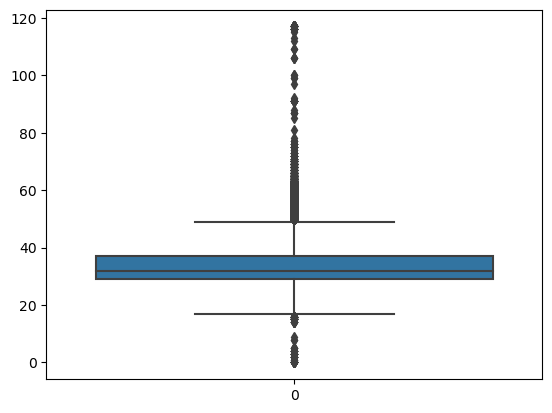

In [27]:
sns.boxplot(df['age'])
plt.show()

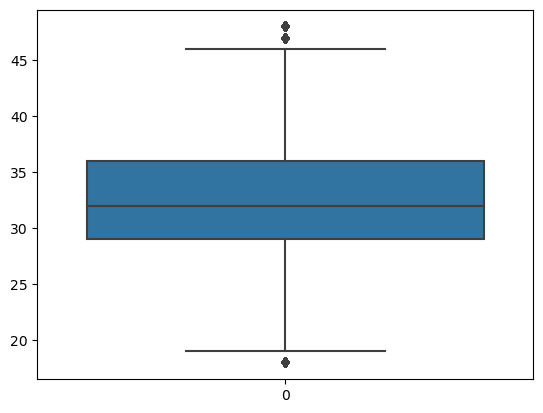

In [30]:
Q1=df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1

lower_whisker = Q1 - (1.5*IQR)
upper_whisker = Q3 +(1.5*IQR)

df_out = df.loc[(df['age']<upper_whisker) & (df['age']>lower_whisker)]
sns.boxplot(df_out['age'])
plt.show()

## Check the distribution of the different categories in the column 'rented for' using appropriate plot.

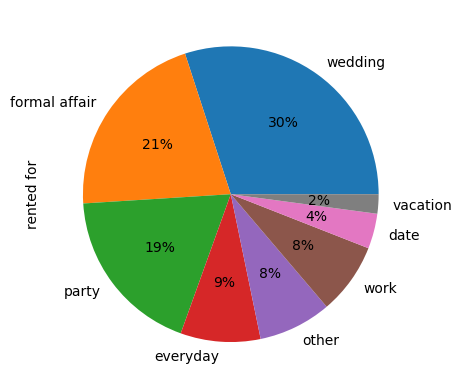

In [31]:
df['rented for'].value_counts().plot(kind ='pie', autopct='%1.0f%%')
plt.show()

# Data Preparation for model building:

## . Encode the categorical variables in the dataset.

In [63]:
df_cat = df.select_dtypes(include = 'object')

le = LabelEncoder()

for col in df_cat:
    df[col] = le.fit_transform(df[col])

In [64]:
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,age_trans
0,0,0,420272,39,2260466,37,10.0,6,4364,3,109622,44,13.0,14,28.0,77,3.332205
1,1,0,273551,37,153475,32,10.0,4,61040,7,59681,20,11.0,12,36.0,1189,3.583519
2,2,0,360448,106,1063761,190,10.0,5,162991,4,74243,45,9.0,4,116.0,411,4.753590
3,3,0,909926,38,126335,35,8.0,2,63856,5,28142,16,10.0,8,34.0,607,3.526361
4,4,0,151944,37,616682,45,10.0,7,42647,1,140372,20,14.0,12,27.0,2205,3.295837


## Standardize the data, so that the values are within a particular range. 

In [74]:
df.drop(['Unnamed: 0', 'user_id','item_id','review_text','review_summary','review_summary','review_date'], axis=1)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,age_trans
0,0,39,37,10.0,6,3,44,13.0,14,28.0,3.332205
1,0,37,32,10.0,4,7,20,11.0,12,36.0,3.583519
2,0,106,190,10.0,5,4,45,9.0,4,116.0,4.753590
3,0,38,35,8.0,2,5,16,10.0,8,34.0,3.526361
4,0,37,45,10.0,7,1,20,14.0,12,27.0,3.295837
...,...,...,...,...,...,...,...,...,...,...,...
192539,0,41,40,10.0,8,3,26,14.0,8,42.0,3.737670
192540,0,25,0,10.0,8,6,16,6.0,4,29.0,3.367296
192541,0,48,35,6.0,1,7,16,13.0,8,31.0,3.433987
192542,0,51,65,10.0,7,5,16,11.0,16,31.0,3.433987


In [82]:


df_cat = df.select_dtypes(exclude = 'object')

le = LabelEncoder()

for col in df_cat:
    df[col] = le.fit_transform(df[col])

In [83]:
df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index = df1.index, columns = df1.columns)

In [84]:
scaled_features_df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date,age_trans
0,-1.732042,-0.556291,-0.272744,-0.295959,1.498732,-0.419953,0.633399,0.565147,-1.648074,-0.177297,0.748692,1.569310,1.044427,0.214132,-0.681975,-1.650564,-0.681975
1,-1.732024,-0.556291,-0.780844,-0.384988,-1.109331,-0.504403,0.633399,-0.244991,-0.623201,1.851763,-0.373566,-0.307247,0.270915,-0.024920,0.202431,0.009280,0.202431
2,-1.732006,-0.556291,-0.481177,2.686512,0.022777,2.164234,0.633399,0.160078,1.220380,0.329968,-0.046333,1.647500,-0.502598,-0.981130,6.503826,-1.152014,6.503826
3,-1.731988,-0.556291,1.423634,-0.340473,-1.144258,-0.453733,-0.764231,-1.055128,-0.572279,0.837233,-1.082300,-0.620006,-0.115842,-0.503025,-0.018670,-0.859452,-0.018670
4,-1.731970,-0.556291,-1.202956,-0.384988,-0.527018,-0.284832,0.633399,0.970216,-0.955802,-1.191826,1.439696,-0.307247,1.431183,-0.024920,-0.792526,1.525828,-0.792526


## Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same

In [85]:
cov_matrix = np.cov(scaled_features_df.T)
print('Covariance matrix', '\n', cov_matrix)

Covariance matrix 
 [[ 1.00000519e+00 -3.01512080e-03  1.48964025e-03  1.74763375e-04
  -2.67587395e-03 -9.09574724e-04 -2.78395176e-03 -1.88082753e-04
   1.65353527e-03 -8.17519844e-04  3.53615491e-04 -1.67702322e-03
   1.59539333e-03  8.19852005e-04 -7.45703101e-04  8.18185027e-04
  -7.45703101e-04]
 [-3.01512080e-03  1.00000519e+00  3.40484663e-03  2.50158302e-03
   2.37666723e-02 -1.82618132e-03 -2.44957039e-01  1.06189969e-02
   2.61717578e-03 -7.37709412e-03  4.72527055e-03  3.35892077e-04
   8.88697037e-04  6.59688095e-02  2.09973990e-03 -6.37093934e-03
   2.09973990e-03]
 [ 1.48964025e-03  3.40484663e-03  1.00000519e+00  5.68147346e-03
  -2.65602072e-03  8.18682397e-03 -6.82868844e-03  1.43849871e-03
   7.70553641e-03 -6.25702094e-03 -6.91167181e-05 -4.19435960e-04
  -4.61185193e-03  3.40318337e-03  5.27599484e-03 -8.72167120e-04
   5.27599484e-03]
 [ 1.74763375e-04  2.50158302e-03  5.68147346e-03  1.00000519e+00
  -1.99653727e-02  3.42738389e-01 -2.02987749e-03  3.58439296e-03

In [87]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

print('Eigen vectors', '\n', eig_vecs)
print('\n')
print('Eigenvalues', '\n',eig_vals)

Eigen vectors 
 [[ 3.15797596e-04  2.01707447e-03 -7.02315770e-03 -2.44321956e-03
   3.49203331e-03 -2.52465706e-03 -2.73966867e-03 -1.65274743e-02
   2.11749269e-02  6.21063660e-03  9.95885208e-02 -7.11328587e-01
  -6.94909265e-01 -3.46582819e-03 -1.72437803e-02  6.31498510e-03
   9.00863822e-30]
 [-3.66068728e-02  3.23015740e-02  2.38767478e-01 -1.17936715e-01
   6.58738380e-01  6.03519012e-02 -2.23128067e-01 -6.53110448e-01
  -9.44470804e-02  5.99196648e-03 -3.46741948e-03  2.60144965e-02
  -1.17881762e-02  1.96950648e-02 -8.90157753e-03  5.02846328e-02
   4.13113351e-17]
 [-1.04682037e-02  4.70077874e-03  1.68116484e-03  9.01772668e-03
   3.01624257e-02  4.05469097e-03  1.20183001e-03 -1.07369371e-02
   6.24507844e-02  6.16938824e-02 -8.64038214e-02 -6.94605349e-01
   7.01850335e-01  5.23504771e-02  6.03245432e-04  7.58812176e-02
  -1.10124418e-16]
 [-2.86451455e-01  3.86201136e-01  3.43643542e-02 -1.86879085e-01
  -7.19174528e-02  7.07888076e-01  2.80203186e-01 -2.81676907e-02
   

In [88]:
total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print('Variance Explained:',var_exp)
print('Cumulative Variance Explained:', cum_var_exp)

Variance Explained: [12.679183091122503, 10.431495224410181, 7.775137118823464, 7.281458470471823, 6.332556002918851, 6.256261352530504, 6.000934493106336, 5.890511077253863, 5.871895870327363, 5.441737232231322, 5.3806552408871156, 5.148189060882163, 4.485757164593269, 4.082708251719764, 3.8442260085731585, 3.0972943401483084, -6.154948780736904e-17]
Cumulative Variance Explained: [ 12.67918309  23.11067832  30.88581543  38.1672739   44.49982991
  50.75609126  56.75702575  62.64753683  68.5194327   73.96116993
  79.34182517  84.49001423  88.9757714   93.05847965  96.90270566
 100.         100.        ]


In [92]:
pca = PCA(n_components = 10)
pca.fit(scaled_features_df)

PCA(n_components=10)

In [93]:
data_pca = pca.transform(scaled_features_df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.773789,-0.333805,1.754732,-1.495959,0.624370,-1.108607,-0.281887,1.397568,-1.104641,-0.890998
1,-0.365717,0.740424,-1.339129,-0.442648,0.285604,-0.638688,0.889971,1.775586,-0.522742,-0.218441
2,8.194005,4.115353,-0.169228,-1.405206,-1.068497,0.339706,2.058149,1.568594,-0.615779,1.366022
3,-0.532242,0.582619,-1.038481,0.564095,0.023490,-1.764772,0.891194,0.123941,-2.190252,0.162493
4,-0.827079,-1.100000,-0.716893,-0.730470,0.672131,1.130021,-1.960350,2.211524,-0.521277,-1.677843


## Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) 

## Find the optimal K Value using elbow plot for K Means clustering.


In [96]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
    
    clusters = KMeans(num_clusters, n_init = 10)
    clusters.fit(data_pca)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)
    
    clusters_df = pd.DataFrame({'num_clusters': cluster_range,
                               'cluster_errors':cluster_errors})
    
    clusters_df

ValueError: All arrays must be of the same length